# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

# cluster your pokemon here

In [22]:
import pandas as pd
import numpy as np

pokemon = pd.read_csv("./assets/pokemon.csv")

In [23]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [24]:
pokemon.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [25]:
abilities = ['height_m', 'weight_kg', 'hp', 'attack', 'defense', 'speed']

In [26]:
pokemon.dropna(subset=abilities, inplace=True)

In [27]:
pokemon.shape

(781, 41)

In [28]:
# z-score normalisation
pokemon[abilities]=(pokemon[abilities]-pokemon[abilities].mean())/pokemon[abilities].std()

In [29]:
from sklearn.cluster import KMeans

# number of pokemon clusters
team_size = 6

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++')
labels = kmeans.fit_predict(pokemon[abilities].values)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

pokemon['cluster'] = labels

In [30]:
abilities.append('cluster')

# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)

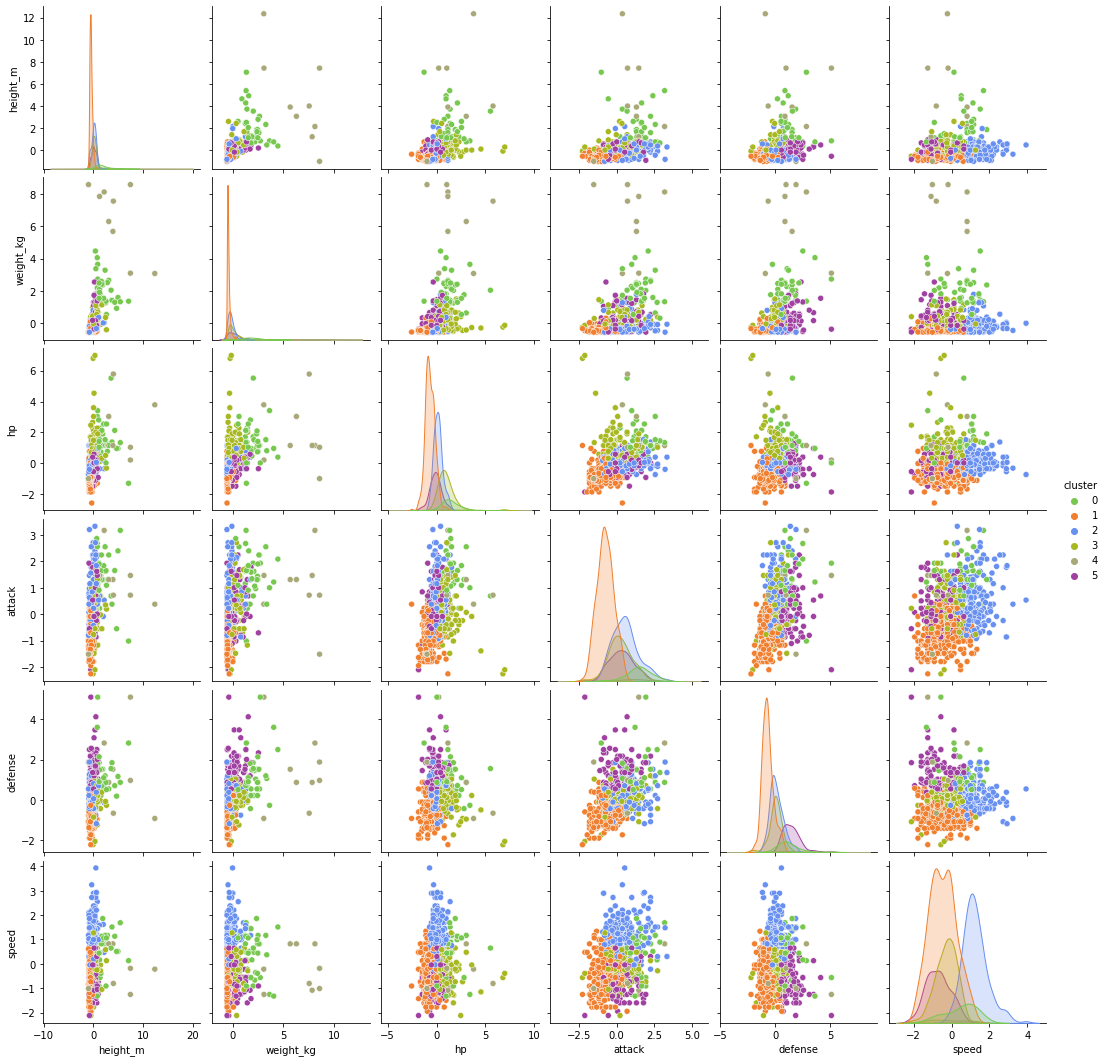

In [31]:
import seaborn as sns
# define colors
pokemon_type_colors = ['#78C850',  # Grass
                       '#F08030',  # Fire
                       '#6890F0',  # Water
                       '#A8B820',  # Bug
                       '#A8A878',  # Normal
                       '#A040A0',  # Poison
                   ]

sns.pairplot(pokemon[abilities], hue="cluster", palette=pokemon_type_colors)

# determine your final pokemon here

In [32]:
def distance_to_other_clusters(pokemon):
    if not pokemon.loc[pokemon.isin(abilities)].all():
        return
    metric = pokemon[abilities[:-1]].values
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_6_abilities = pokemon[abilities]
pokemon_dissimilarity = pokemon_6_abilities.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_6_abilities.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [33]:
chosen_pokemon

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
94,7.068335,1.359080,-1.282734,-1.014593,2.824041,0.128731,0,39.156273,Onix
348,-0.521965,-0.493605,-1.846184,-1.945584,-1.720527,0.474702,1,29.406269,Feebas
385,0.496246,-0.005287,-0.719283,0.537058,0.551757,3.934406,2,28.347385,Deoxys
112,-0.059142,-0.244874,6.793391,-2.255914,-2.207445,-0.563210,3,42.600177,Chansey
320,12.344519,3.078255,3.788321,0.381893,-0.908997,-0.217239,4,64.738780,Wailord
212,-0.521965,-0.373812,-1.846184,-2.100749,5.096325,-2.120077,5,38.014608,Shuckle


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

# Assign dissimilarity to your pokemon here

In [34]:
def distance_to_other_clusters(pokemon):
    if not pokemon.loc[pokemon.isin(abilities)].all():
        return
    metric = pokemon[abilities[:-1]].values
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(np.abs(metric - center))
     
    return distance

# evaluate all pokemon
pokemon_6_abilities = pokemon[abilities]
pokemon_dissimilarity = pokemon_6_abilities.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_6_abilities.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [35]:
chosen_pokemon

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
94,7.068335,1.359080,-1.282734,-1.014593,2.824041,0.128731,0,72.214469,Onix
348,-0.521965,-0.493605,-1.846184,-1.945584,-1.720527,0.474702,1,63.417020,Feebas
797,-0.799659,-0.560361,-0.381213,3.205898,1.882666,1.478016,2,55.834492,Kartana
112,-0.059142,-0.244874,6.793391,-2.255914,-2.207445,-0.563210,3,80.077452,Chansey
320,12.344519,3.078255,3.788321,0.381893,-0.908997,-0.217239,4,103.115717,Wailord
212,-0.521965,-0.373812,-1.846184,-2.100749,5.096325,-2.120077,5,79.567601,Shuckle


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [36]:
abilities = ['height_m', 'weight_kg', 'type1', 'type2']


In [37]:
pokemon.dropna(inplace=True)

In [38]:
pokemon_2 = pokemon[abilities]

In [39]:
pokemon_2.shape

(339, 4)

In [40]:
pokemon_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 783
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   height_m   339 non-null    float64
 1   weight_kg  339 non-null    float64
 2   type1      339 non-null    object 
 3   type2      339 non-null    object 
dtypes: float64(2), object(2)
memory usage: 13.2+ KB


In [49]:
pokemon_3 = pd.get_dummies(pokemon_2, columns=['type1', 'type2'], drop_first=True)

In [50]:
# z-score normalisation
pokemon_3.iloc[:, 2:]=(pokemon_3.iloc[:, 2:]-pokemon_3.iloc[:, 2:].mean())/pokemon_3.iloc[:, 2:].std()

In [51]:
pokemon_3.shape

(339, 36)

In [52]:
from sklearn.cluster import KMeans

# number of pokemon clusters
team_size = 6

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++')
labels = kmeans.fit_predict(pokemon_3.values)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

pokemon_3['cluster'] = labels

In [71]:
abilities= pokemon_3.columns

In [68]:
cluster_centers.shape

(6, 36)

In [56]:
pokemon_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 783
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   height_m        339 non-null    float64
 1   weight_kg       339 non-null    float64
 2   type1_dark      339 non-null    float64
 3   type1_dragon    339 non-null    float64
 4   type1_electric  339 non-null    float64
 5   type1_fairy     339 non-null    float64
 6   type1_fighting  339 non-null    float64
 7   type1_fire      339 non-null    float64
 8   type1_flying    339 non-null    float64
 9   type1_ghost     339 non-null    float64
 10  type1_grass     339 non-null    float64
 11  type1_ground    339 non-null    float64
 12  type1_ice       339 non-null    float64
 13  type1_normal    339 non-null    float64
 14  type1_poison    339 non-null    float64
 15  type1_psychic   339 non-null    float64
 16  type1_rock      339 non-null    float64
 17  type1_steel     339 non-null    flo

In [69]:
pokemon_3.iloc[:, :-1].values.shape

(339, 36)

In [72]:
def distance_to_other_clusters(pokemon4):
    
    metric = pokemon4[abilities[:-1]].values
    cluster_number = round(pokemon4['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_3.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_3.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [73]:
chosen_pokemon

,height_m,weight_kg,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,...,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,cluster,dissimilarity,name
207,7.438593,3.096544,-0.236452,-0.174085,-0.134033,-0.076923,-0.134033,-0.250022,-0.076923,-0.222237,...,-0.174085,-0.10911,-0.316785,-0.222237,-0.207243,-0.222237,-0.222237,0,56.923525,Steelix
306,-0.521965,-0.458856,-0.236452,-0.174085,-0.134033,-0.076923,7.438836,-0.250022,-0.076923,-0.222237,...,-0.174085,-0.10911,-0.316785,4.486418,-0.207243,-0.222237,-0.222237,1,50.001917,Meditite
94,7.068335,1.359080,-0.236452,-0.174085,-0.134033,-0.076923,-0.134033,-0.250022,-0.076923,-0.222237,...,-0.174085,-0.10911,-0.316785,-0.222237,-0.207243,-0.222237,-0.222237,2,50.099080,Onix
175,-0.521965,-0.532013,-0.236452,-0.174085,-0.134033,12.961595,-0.134033,-0.250022,-0.076923,-0.222237,...,-0.174085,-0.10911,-0.316785,-0.222237,-0.207243,-0.222237,-0.222237,3,70.591169,Togetic
474,0.403681,-0.085759,-0.236452,-0.174085,-0.134033,-0.076923,-0.134033,-0.250022,-0.076923,-0.222237,...,-0.174085,-0.10911,-0.316785,-0.222237,-0.207243,-0.222237,-0.222237,4,41.225833,Gallade
713,-0.614530,-0.488119,-0.236452,-0.174085,-0.134033,-0.076923,-0.134033,-0.250022,12.961595,-0.222237,...,-0.174085,-0.10911,-0.316785,-0.222237,-0.207243,-0.222237,-0.222237,5,74.544666,Noibat


But wait, did you properly **normalize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example normalizes its data using the **z-score**. What does this mean? z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [ ]:
# normalize and scale your data in such a way that pokémon type similarity matters more than the other metrics

## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

In [ ]:
# compare your techniques here